In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('dark_background')

%matplotlib inline

In [2]:
df = pd.read_csv('./data/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


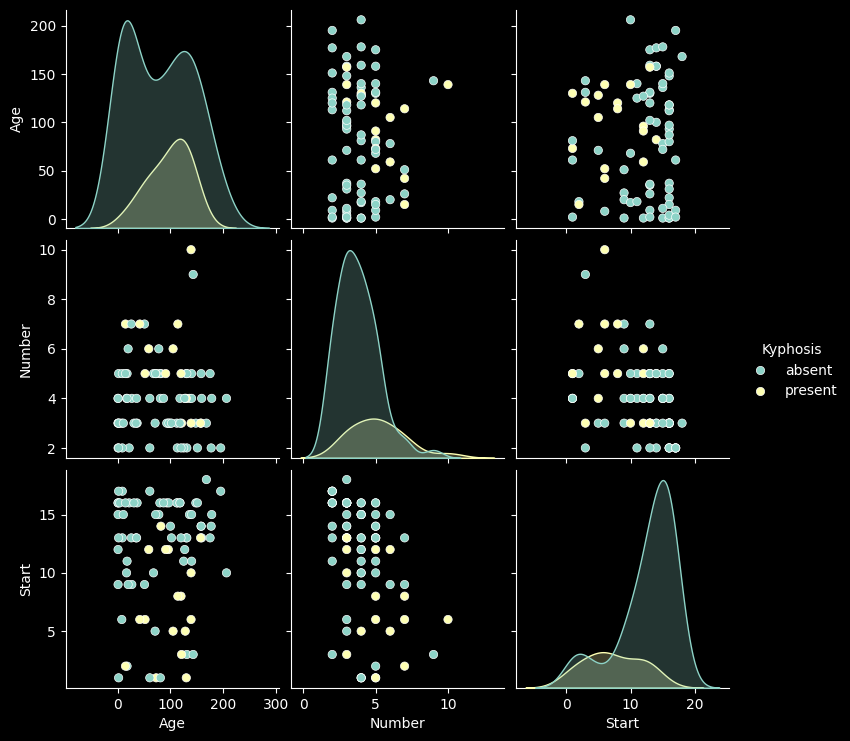

In [4]:
sns.pairplot(data=df, hue='Kyphosis')

In [11]:
X = df.drop('Kyphosis', axis=1)
Y = df['Kyphosis']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [14]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
predictions = dtree.predict(x_test)

print(f"Classification Report:\n{classification_report(y_test, predictions)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}")

Classification Report:
              precision    recall  f1-score   support

      absent       0.95      0.78      0.86        23
     present       0.17      0.50      0.25         2

    accuracy                           0.76        25
   macro avg       0.56      0.64      0.55        25
weighted avg       0.88      0.76      0.81        25


Confusion Matrix:
[[18  5]
 [ 1  1]]


In [17]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)

print(f"Classification Report:\n{classification_report(y_test, predictions)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}")

Classification Report:
              precision    recall  f1-score   support

      absent       0.95      0.83      0.88        23
     present       0.20      0.50      0.29         2

    accuracy                           0.80        25
   macro avg       0.57      0.66      0.58        25
weighted avg       0.89      0.80      0.84        25


Confusion Matrix:
[[19  4]
 [ 1  1]]
